In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = [8,6]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange,linspace,meshgrid,array

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

  - Local mins and maxes occur at critical points (usually where $\nabla f = \vec 0$).
  - Critical points with no local extrema are saddle points
  - 2nd Derivative Test: $$D = \begin{vmatrix} f_{xx} & f_{xy} \\ f_{xy} & f_{yy} \end{vmatrix}_{(a,b)}$$

Then, 
  - if $D>0$ and $f_{xx} < 0$, $f(a,b)$ is a local maximum.
  - if $D>0$ and $f_{xx} > 0$, $f(a,b)$ is a local minimum.
  - if $D<0$, $(a,b)$ is a saddle point. 

Otherwise, the test is inconclusive.

<p style="padding-bottom:40%;"> </p>

# Lecture 13

  - Objectives
    - Identify open and closed sets
    - Solve unconstrained optimization problems
    - Solve constrained optimization problems (Lagrange Multipliers)
    
    
  - Resources
    - Content
      - Stewart: §14.8
      - New Strang: [§4.8](https://openstax.org/books/calculus-volume-3/pages/4-8-lagrange-multipliers)
    - Practice
      - Mooculus: [Constrained Optimization](https://ximera.osu.edu/mooculus/calculus3/constrainedOptimization/digInConstrainedOptimization) [Lagrange Multipliers](https://ximera.osu.edu/mooculus/calculus3/lagrangeMultipliers/digInLagrangeMultipliers)
    - Extras
      - CalcBLUE: [Optimization](https://www.youtube.com/watch?v=CBWMHf1MfEs&list=PL8erL0pXF3JZZTnqjginERYYEi1WpLE_V&index=110) 

## Definitions 

A set $S$ is **open** if all points are interior points.

A set $S$ is **closed** if it contains all its boundary points.

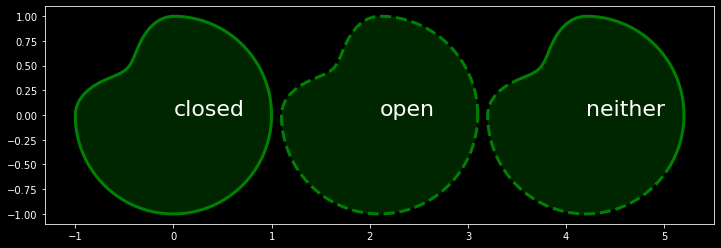

In [2]:
def rr(t):
    if pi/2 < t < pi:
        return 2/3+1/3*cos(2*t)**2
    else:
        return 1.

rr = np.vectorize(rr)

t = np.linspace(0,np.pi*2,100)
plt.figure(figsize=(12,4))
plt.fill(rr(t)*cos(t),rr(t)*sin(t),'g',alpha=.3)
plt.plot(rr(t)*cos(t),rr(t)*sin(t),'-g',2.1+rr(t)*cos(t),rr(t)*sin(t),'--g',lw=3)
plt.fill(rr(t)*cos(t)+2.1,rr(t)*sin(t),'g',alpha=.3)
plt.fill(rr(t)*cos(t)+2*2.1,rr(t)*sin(t),'g',alpha=.3)
t=np.linspace(-pi/6,5*pi/6,50)
plt.plot(4.2+rr(t)*cos(t),rr(t)*sin(t),'-g',4.2+rr(t+pi)*cos(t+pi),rr(t+pi)*sin(t+pi),'--g',lw=3);
plt.text(2.1,0,"open",fontsize=22);
plt.text(4.2,0,"neither",fontsize=22);
plt.text(0,0,"closed",fontsize=22);

<p style="padding-bottom:40%;"> </p>

# Optimization


### Theorem (Fermat, I guess)

If a local maximum or minimum of a function $f:D\to \RR$ occurs at an interior point $\vec p$, then $\vec p$ is a critical point of $f$. 

### Extreme Value Theorem

If $D\in \RR^n$ is closed and bounded and $f:D\to \RR$ is continuous, then there is an $\vec x \in D$ such that $f(\vec x)$ is the **global maximum**. That is, $f(\vec y) \leq f(\vec x)$.  

The same holds for the global minimum, mutatis mutandis. 

In [3]:
@interact
def _(angle=(-126,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca(projection='3d')
    th = linspace(0,2*pi,100)
    r = linspace(0,1,100)
    r,th = meshgrid(r,th)
    X = 3/2*r * rr(th-pi/2) *cos(th) + 1/2
    Y = 3/2*r * rr(th-pi/2) *sin(th)
    Z = X**4 + Y**4 - 4*X*Y - 1
    ax.plot_surface(X,Y,0*Z - 1,color='gray',alpha=.3)
    ax.plot_surface(X,Y,Z/4,cmap='ocean')
    ax.contour(X,Y,Z/4,offset=-1,levels=32,cmap='ocean')
    ax.set_zlim(-1,4)
    ax.view_init(vangle,angle)

interactive(children=(IntSlider(value=-6, description='angle', max=120, min=-126, step=6), IntSlider(value=42,…

<p style="padding-bottom:40%;"> </p>

## Consequences

When trying to find the absolute extrema of a function $f$ on a set $D$, 
  - Find all critical points of $f$ in $D$ (unconstrained optimization). 
  - Find the extremes on the boundary of $D$ (constrained - Lagrange Multipliers).

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

## First Example - Unconstrained optimization.

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

In [4]:
@interact
def _(angle=(-120,30,6)):
    fig= plt.figure(figsize=(7,7),dpi=100)
    ax = fig.add_subplot(111,projection='3d')
    x = y = np.linspace(-3/2,3/2,100)
    x,y = np.meshgrid(x,y)
    ax.view_init(30,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(x,y,x - 2*y + 3,alpha=.5,cmap="ocean")
    ax.set_zlim3d([0,4])
    ax.plot([0,-1/2],[0,1],[0,1/2])
    ax.plot([0,0],[0,0],[0,4],'k')
    ax.plot([0,0],[-2,2],[0,0],'k')
    ax.plot([-2,2],[0,0],[0,0],'k');

interactive(children=(IntSlider(value=-48, description='angle', max=30, min=-120, step=6), Output()), _dom_cla…

<p style="padding-bottom:40%;"> </p>

# Constrained Optimization - Lagrange Multipliers

Below is the contour plot of a function $f$ and a path (in red). Visually find the point on the path with the greatest and least values of $f$  

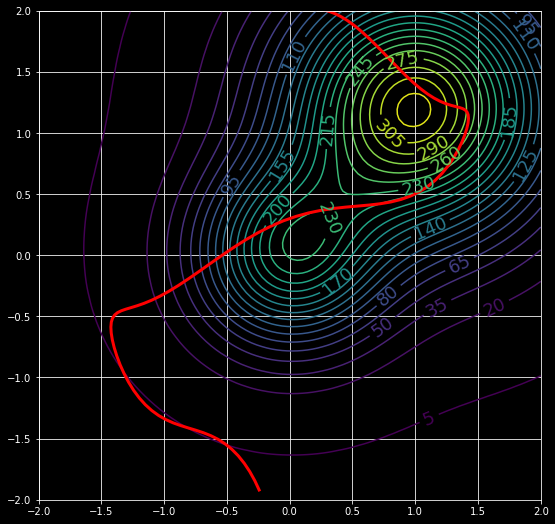

In [5]:
x = y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(9,9))
plt.grid(True)
cp = plt.contour(X,Y,4+200*exp(-2*(X**2+Y**2)) + 320*exp(-1*((X-1)**2+(Y-1.2)**2)),levels=np.arange(5,350,15))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(x/2+sin(2*x),.2+.9*x + .1*cos(7*x) - (np.abs(x) - x)**2/48,'-r',lw=3)
# plt.colorbar();
plt.ylim((-2,2));

<p style="padding-bottom:40%;"> </p>

## Theorem (Lagrange Multipliers

If $f(a,b)$ is a local extremum of $f$ _subject to the constraint_ $g(x,y) = c$ and $\nabla g(a,b) \neq \mathbf 0$, then there exists a scalar $\lambda$ such that $$\nabla f = \lambda \nabla g.$$

In [6]:
@interact(t=(-2.,2,.05))
def _(t=-2,f=fixed(lambda X,Y: 4+200*exp(-2*(X**2+Y**2)) + 320*exp(-1*((X-1)**2+(Y-1.2)**2))),h=fixed(.1)):
    x = y = np.linspace(-2,2,100)
    X,Y = np.meshgrid(x,y)
    plt.figure(figsize=(9,9))
    plt.grid(True)
    cp = plt.contour(X,Y,f(X,Y),levels=np.arange(5,350,15))
    plt.clabel(cp,fmt = "%d",fontsize=18);
    rx = lambda x: x/2+sin(2*x)
    ry= lambda x: .2+.9*x + .1*cos(7*x) - (np.abs(x) - x)**2/48
    plt.plot(rx(x),ry(x),'-r',lw=3)
    gfx,gfy = ( (f(rx(t)+h,ry(t)) - f(rx(t),ry(t)))/h,(f(rx(t),ry(t)+h) - f(rx(t),ry(t)))/h) 
    plt.quiver([rx(t),rx(t)],[ry(t),ry(t)],[gfx/100,(ry(t+h)-ry(t-h))/(2*h)],[gfy/100,(rx(t+h)-rx(t-h))/(-2*h)],color=['b','r'])
    plt.ylim((-2,2));

interactive(children=(FloatSlider(value=-2.0, description='t', max=2.0, min=-2.0, step=0.05), Output()), _dom_…

[See demo here.](https://drew.youngren.nyc/mvc-f20/jsx/)

<p style="padding-bottom:40%;"> </p>

### Example - Constrained optimization.

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

<p style="padding-bottom:40%;"> </p>

### Example

Find the minimum surface area of a lidless shoebox with volume $32 \text{ L}$.

[See demo here.](https://drew.youngren.nyc/mvc-f20/lagrange-box.html)

<p style="padding-bottom:40%;"> </p>

In [7]:
@interact
def _(lev=(3000,5600,200),angle=(-108,90,6),vangle=(0,90,6)):
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca(projection='3d')
    ax.view_init(vangle,angle)
    x = y = linspace(20,50,100)
    x,y = meshgrid(x,y)
    ax.plot_surface(x,y,32000/(x*y))
    ax.plot_surface(x,y,(lev - x*y)/(2*x + 2*y),alpha=.5)
    ax.set_zlim(0,80)

interactive(children=(IntSlider(value=4200, description='lev', max=5600, min=3000, step=200), IntSlider(value=…

<p style="padding-bottom:40%;"> </p>

### Example 

Suppose the temperature distribution on the closed half-disk $0 \leq y \leq \sqrt{16-x^2}$ is given by

$$u(x,y) = x^2 - 6x + 4y^2 - 8y. $$

Find the hottest and coldest points.  

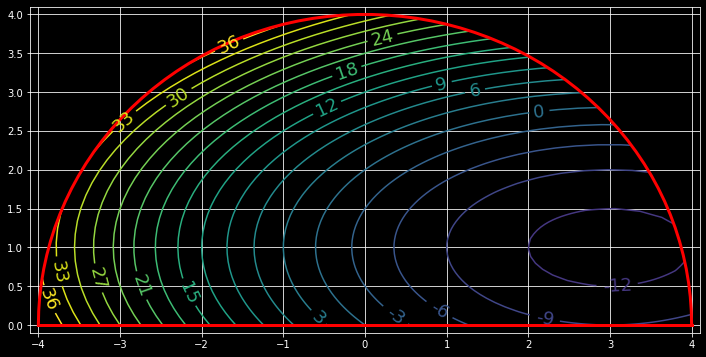

In [8]:
def u(x,y):
    return x**2 - 6*x + (4*y**2 - 8*y)
plt.figure(figsize=np.array((10,5))*1.2)
r = np.linspace(0,4,70)
th = np.linspace(0,np.pi,70)
R,T = np.meshgrid(r,th)
plt.grid(True)
cp = plt.contour(R*cos(T),R*sin(T),u(R*cos(T),R*sin(T)) ,levels=np.arange(-21,39,3))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(4*cos(th),4*sin(th),'-r',lw=3)
plt.plot(4*cos(th),np.zeros_like(th),'-r',lw=3)
plt.xlim((-4.10,4.1));
plt.ylim((-.10,4.1));

**Solution.** See [this tutorial](../tutorial/SystemsOfEquations.ipynb) for the particulars. 

<p style="padding-bottom:40%;"> </p>

### Exercise

By investing $x$ units of labor and $y$ units of capital, a low-end watch manufacturer can produce $x^{0.4}y^{0.6}$ watches. Find the maximum number of watches that can be produced with a budget of $\$20000$ if labor costs $\$100$ per unit and capital costs $\$200$ per unit.

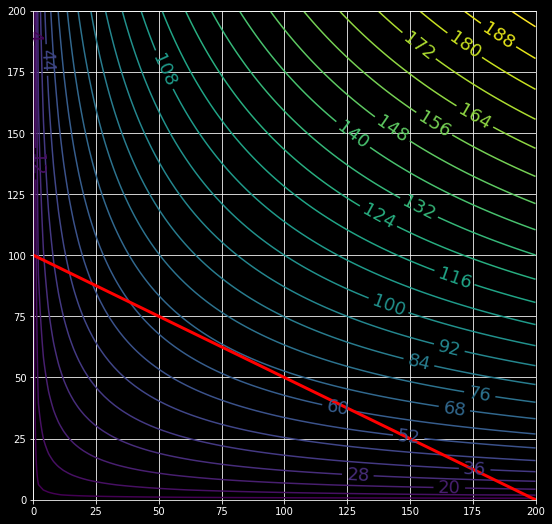

In [9]:
x = y = np.linspace(0,200,100)
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(9,9))

plt.grid(True)
cp = plt.contour(X,Y,X**.4*Y**.6,levels=np.arange(4,200,8))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(x,100 - x/2,'-r',lw=3);
# plt.ylim((-2,2));